<p style=" background-color:#4682b4;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>Boston Housing Dataset</b></span></p>

In [1384]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format

In [1385]:
df = pd.read_csv('BostonHousing.csv')
df0 = df.copy()

In [1386]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


# EDA

In [1388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [1389]:
df.shape

(506, 14)

In [1390]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.000,3.614,8.602,0.006,0.082,0.257,3.677,88.976
zn,506.000,11.364,23.322,0.000,0.000,0.000,12.500,100.000
indus,506.000,11.137,6.860,0.460,5.190,9.690,18.100,27.740
chas,506.000,0.069,0.254,0.000,0.000,0.000,0.000,1.000
nox,506.000,0.555,0.116,0.385,0.449,0.538,0.624,0.871
rm,501.000,6.284,0.706,3.561,5.884,6.208,6.625,8.780
age,506.000,68.575,28.149,2.900,45.025,77.500,94.075,100.000
dis,506.000,3.795,2.106,1.130,2.100,3.207,5.188,12.127
rad,506.000,9.549,8.707,1.000,4.000,5.000,24.000,24.000
tax,506.000,408.237,168.537,187.000,279.000,330.000,666.000,711.000


In [1391]:
# Changing column names
df.columns = ['crime_rate', 'large_lot_ratio', 'non_retail_ratio', 'near_charles_river', 
              'nitrogen_oxides', 'avg_rooms', 'old_house_ratio', 'distance_to_employment', 
              'access_to_highways', 'property_tax', 'student_teacher_ratio', 'black_population_ratio', 
              'lower_status_population', 'median_home_value']

In [1392]:
df.head()

,crime_rate,large_lot_ratio,non_retail_ratio,near_charles_river,nitrogen_oxides,avg_rooms,old_house_ratio,distance_to_employment,access_to_highways,property_tax,student_teacher_ratio,black_population_ratio,lower_status_population,median_home_value
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


In [1393]:
df.isnull().sum()

crime_rate                 0
large_lot_ratio            0
non_retail_ratio           0
near_charles_river         0
nitrogen_oxides            0
avg_rooms                  5
old_house_ratio            0
distance_to_employment     0
access_to_highways         0
property_tax               0
student_teacher_ratio      0
black_population_ratio     0
lower_status_population    0
median_home_value          0
dtype: int64

In [1394]:
df['avg_rooms'] = df['avg_rooms'].fillna(df.groupby('median_home_value')['avg_rooms'].transform('mean'))

In [1395]:
df['avg_rooms'] = df['avg_rooms'].fillna(df.groupby('large_lot_ratio')['avg_rooms'].transform('mean'))

In [1396]:
df.shape

(506, 14)

In [1397]:
df.isnull().sum()

crime_rate                 0
large_lot_ratio            0
non_retail_ratio           0
near_charles_river         0
nitrogen_oxides            0
avg_rooms                  0
old_house_ratio            0
distance_to_employment     0
access_to_highways         0
property_tax               0
student_teacher_ratio      0
black_population_ratio     0
lower_status_population    0
median_home_value          0
dtype: int64

In [1398]:
df.duplicated().sum()

0

## Outliers

In [1400]:
def outliers(df):

    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = df[(df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]

        

        print(f"{col} - Outliers:")

        
        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])  

        print("---------------------------")

In [1401]:
outliers(df)

crime_rate - Outliers:
Number of Outliers: 30
     crime_rate
374      18.498
375      19.609
376      15.288
378      23.648
379      17.867
380      88.976
381      15.874
384      20.085
385      16.812
386      24.394
387      22.597
398      38.352
400      25.046
403      24.802
404      41.529
405      67.921
406      20.716
410      51.136
412      18.811
413      28.656
414      45.746
415      18.085
417      25.941
418      73.534
425      15.860
427      37.662
437      15.177
440      22.051
468      15.576
477      15.023
---------------------------
large_lot_ratio - Outliers:
Number of Outliers: 45
     large_lot_ratio
39            75.000
40            75.000
54            75.000
55            90.000
56            85.000
57           100.000
65            80.000
66            80.000
193           60.000
194           60.000
195           80.000
196           80.000
197           80.000
198           80.000
199           95.000
200           95.000
201           82.500
2

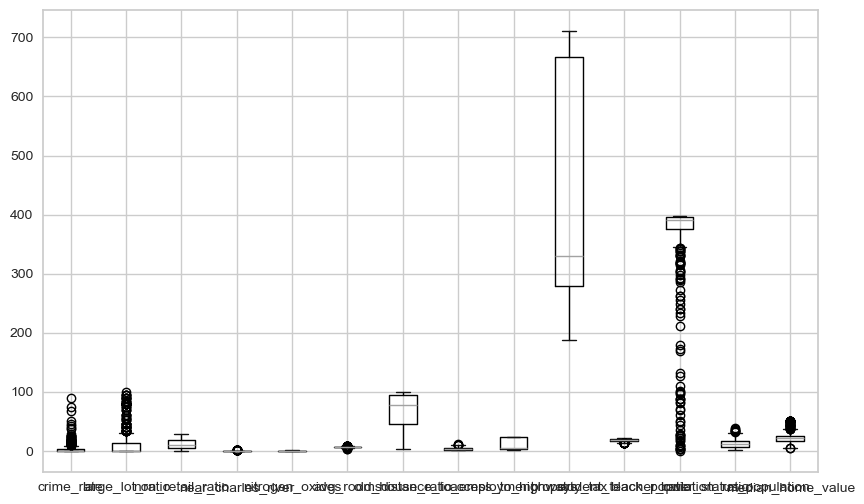

In [1402]:
df.boxplot()
plt.show()

In [1403]:
# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = handle_outliers(df, col)

In [1404]:
outliers(df)

crime_rate - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [crime_rate]
Index: []
---------------------------
large_lot_ratio - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [large_lot_ratio]
Index: []
---------------------------
non_retail_ratio - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [non_retail_ratio]
Index: []
---------------------------
near_charles_river - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [near_charles_river]
Index: []
---------------------------
nitrogen_oxides - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [nitrogen_oxides]
Index: []
---------------------------
avg_rooms - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [avg_rooms]
Index: []
---------------------------
old_house_ratio - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [old_house_ratio]
Index: []
---------------------------
distance_to_employment - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [distance_to_em

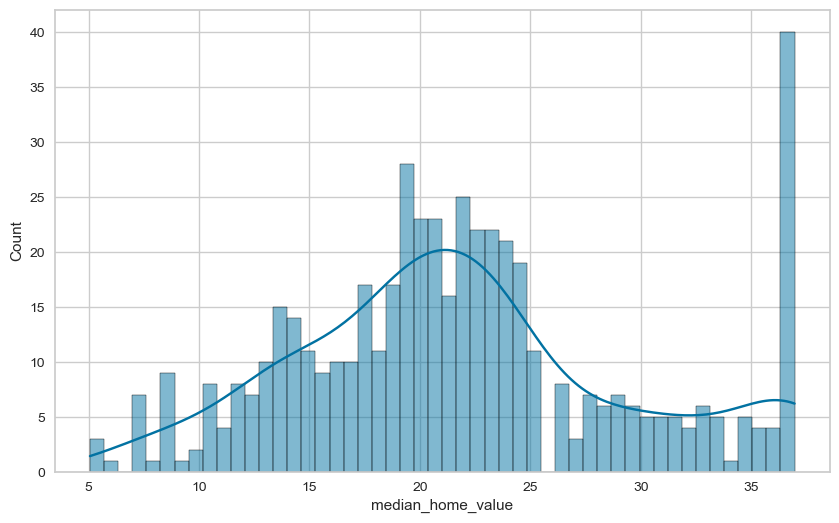

In [1405]:
sns.histplot(df.median_home_value, bins=50, kde=True)
plt.show()

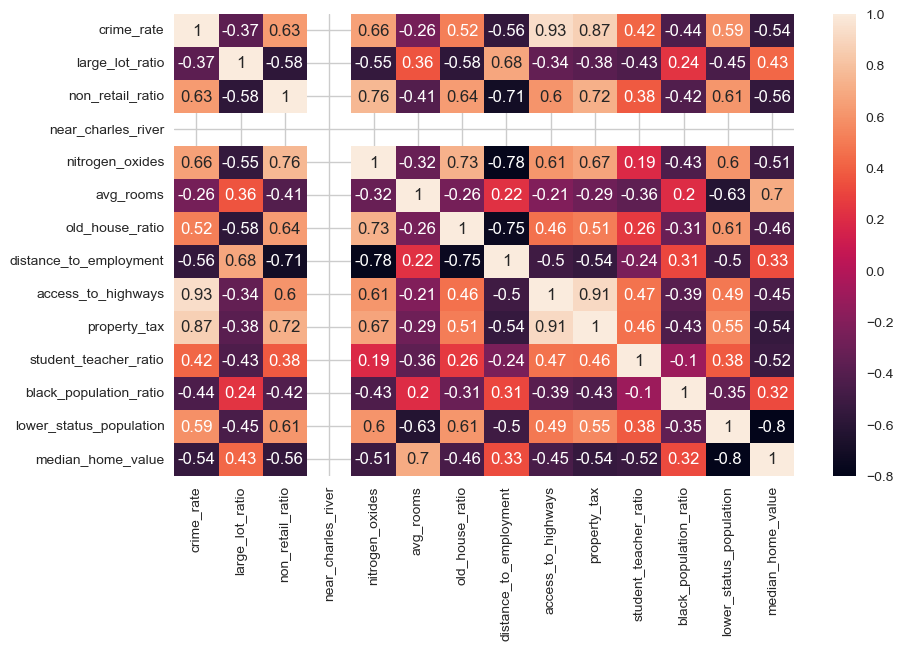

In [1406]:
sns.heatmap(df.corr().round(2), annot = True)
plt.show()

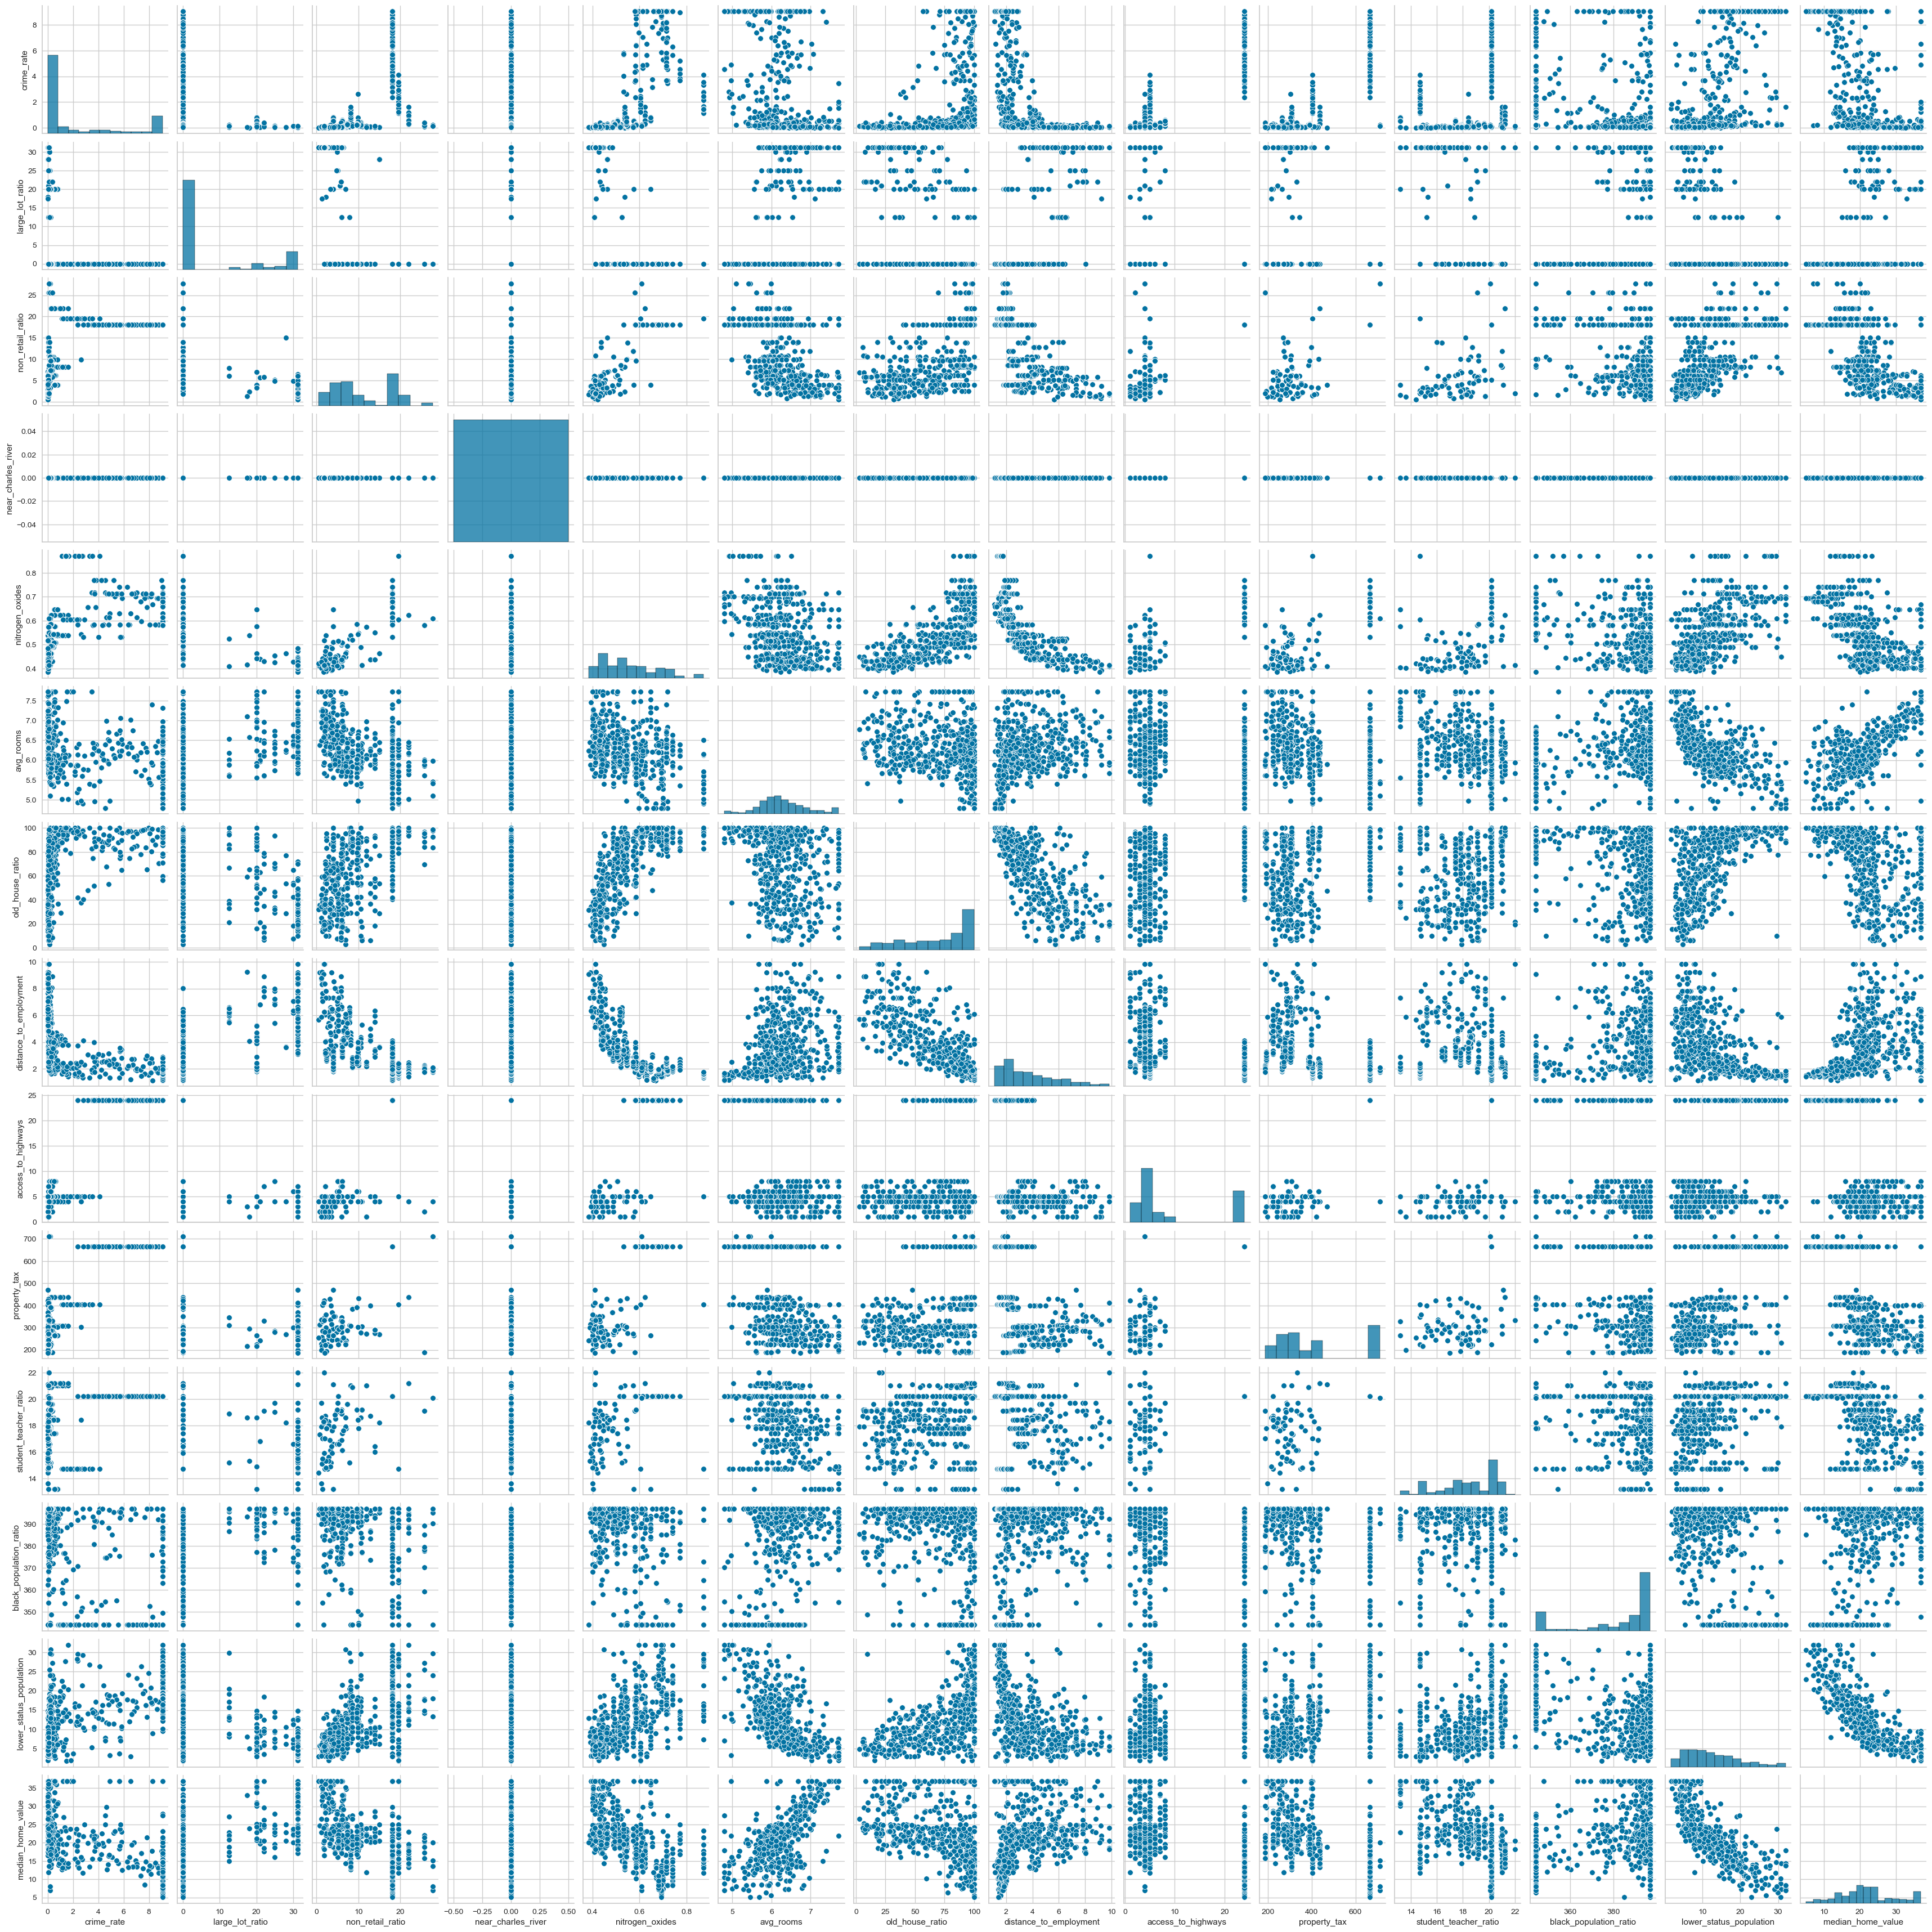

In [1407]:
sns.pairplot(df)
plt.show()

# Train | Test Split

In [1409]:
X = df.drop("median_home_value", axis=1)
y = df.median_home_value

In [1410]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [1411]:
X_train.shape

(404, 13)

In [1412]:
X_test.shape

(102, 13)

# Implement Linear Regression

In [1414]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [1415]:
from sklearn.linear_model import LinearRegression 

In [1416]:
scaler = StandardScaler()

In [1417]:
X_train_scaled = scaler.fit_transform(X_train)

In [1418]:
X_test_scaled = scaler.transform(X_test)

In [1419]:
model_lin = LinearRegression()

In [1420]:
model_lin.fit(X_train_scaled, y_train)

LinearRegression()

In [1421]:
train_val(model_lin, X_train_scaled, y_train, X_test_scaled, y_test )

,train,test
R2,0.781,0.773
mae,2.626,2.706
mse,12.486,12.941
rmse,3.533,3.597


In [1422]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)      
    n = df.shape[0]                   
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  
    return adj_r2

In [1423]:
y_pred = model_lin.predict(X_test_scaled)

In [1424]:
adj_r2(y_test, y_pred, df)

0.7669515244341377

In [1425]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [1426]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                               0.748
train_r2                              0.781
test_neg_mean_absolute_error         -2.724
train_neg_mean_absolute_error        -2.620
test_neg_mean_squared_error         -13.607
train_neg_mean_squared_error        -12.429
test_neg_root_mean_squared_error     -3.639
train_neg_root_mean_squared_error    -3.525
dtype: float64

In [1427]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

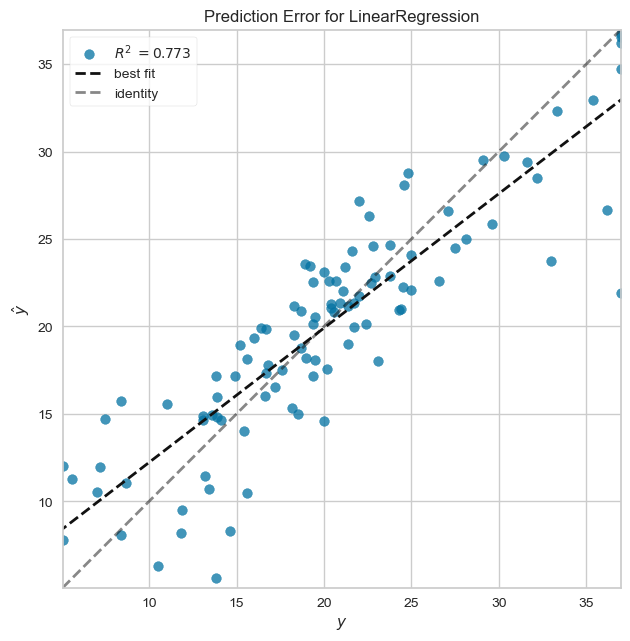

In [1428]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

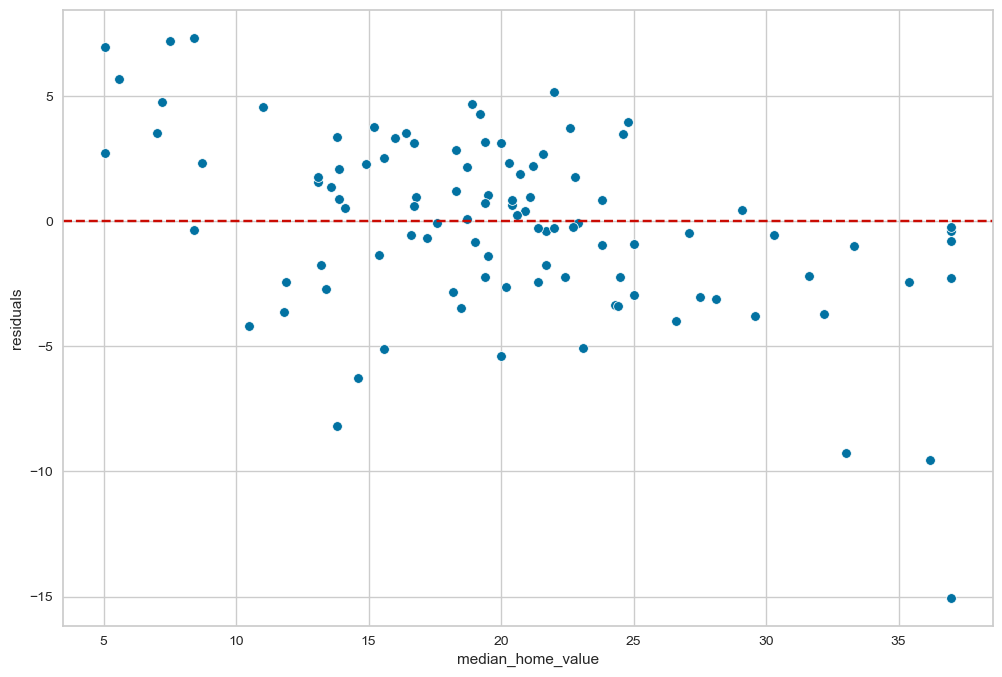

In [1429]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# Implement Ridge Regression

In [1431]:
from sklearn.linear_model import Ridge

In [1432]:
ridge_model = Ridge(alpha = 1)

In [1433]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=1)

In [1434]:
train_val(ridge_model,X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.781,0.773
mae,2.626,2.701
mse,12.488,12.937
rmse,3.534,3.597


## GridSearch for Ridge

In [1436]:
from sklearn.model_selection import GridSearchCV

In [1437]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [1438]:
ridge_model = Ridge() 

In [1439]:
param_grid = {"alpha":alpha_space}

In [1440]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [1441]:
ridge_grid_model.fit(X_train_scaled,y_train) 

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [1442]:
ridge_grid_model.best_params_

{'alpha': 5.06}

In [1443]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.780,0.773
mae,2.634,2.693
mse,12.523,12.947
rmse,3.539,3.598


# Lasso Regression

In [1445]:
from sklearn.linear_model import Lasso

In [1446]:
lasso_model  = Lasso(alpha = 1) 

In [1447]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [1448]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.708,0.710
mae,3.202,3.014
mse,16.597,16.518
rmse,4.074,4.064


## GridSearch for Lasso

In [1450]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [1451]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [1452]:
lasso_grid_model.best_params_

{'alpha': 0.01}

In [1453]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.780,0.774
mae,2.627,2.696
mse,12.492,12.908
rmse,3.534,3.593


# Implement Elastic-Net

In [1455]:
from sklearn.linear_model import ElasticNet

In [1456]:
elastic_model = ElasticNet()

In [1457]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet()

In [1458]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.689,0.689
mae,3.324,3.139
mse,17.680,17.699
rmse,4.205,4.207


## GridSearch for ElasticNet

In [1460]:
elastic_model = ElasticNet()

In [1461]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [1462]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [1463]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [1464]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.707,0.709
mae,3.210,3.022
mse,16.667,16.592
rmse,4.082,4.073


# Final Model

In [1466]:
final_model = Ridge(alpha=2.03)

In [1467]:
scaler = StandardScaler()

In [1468]:
X_scaled = scaler.fit_transform(X)

In [1469]:
final_model.fit(X_scaled, y)

Ridge(alpha=2.03)

# Prediction

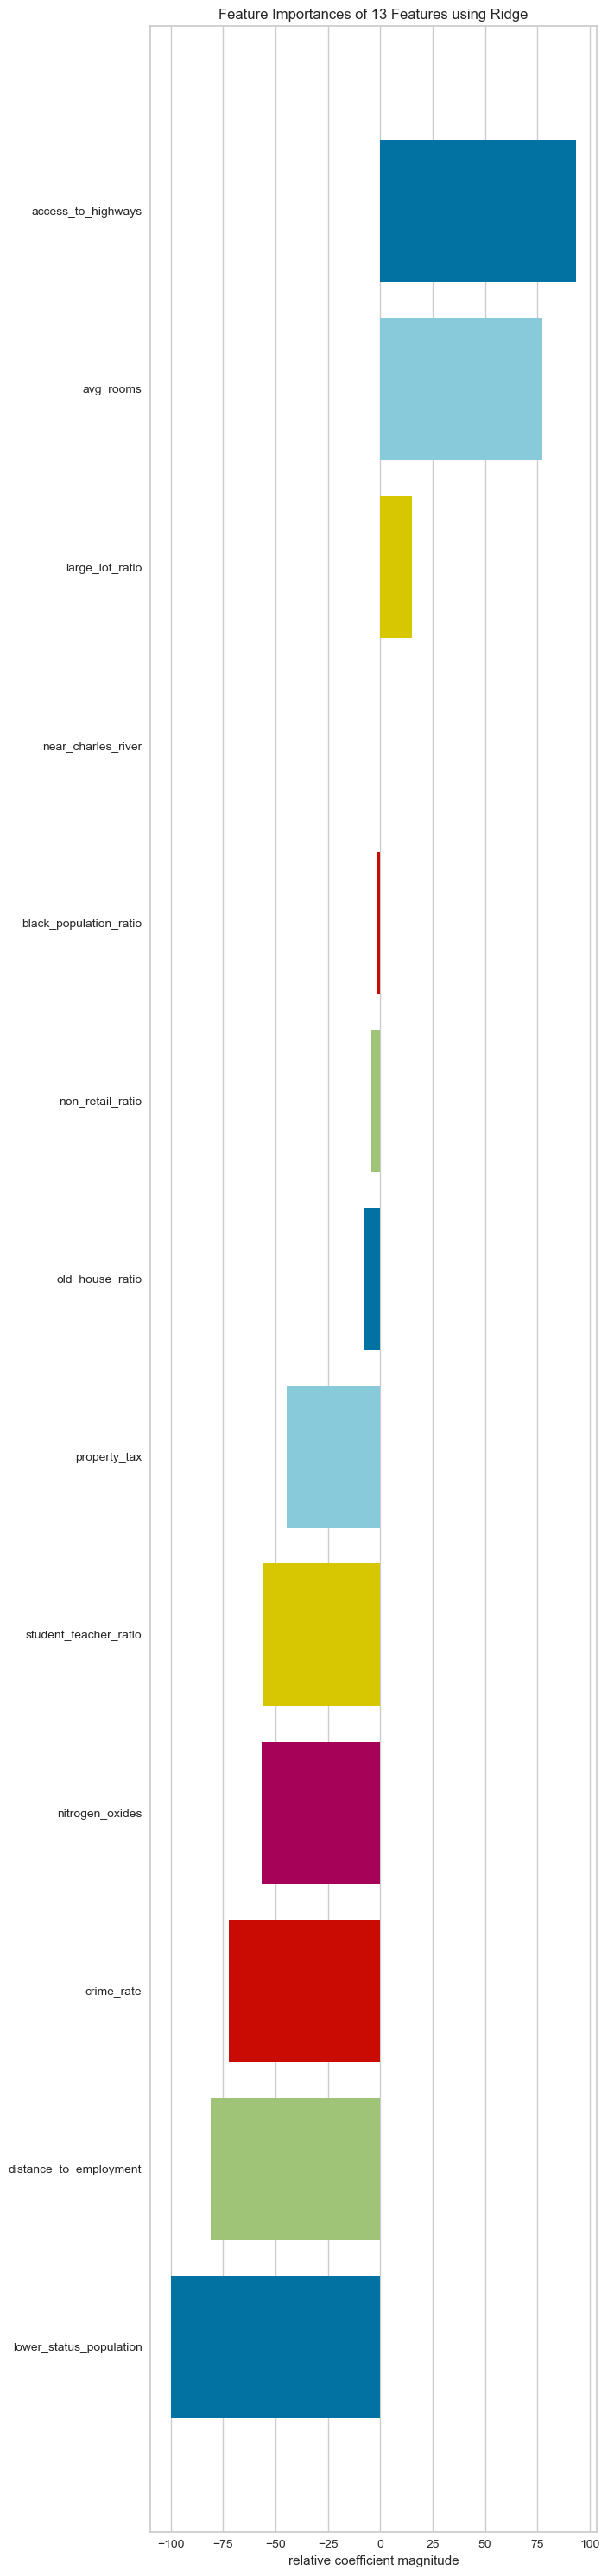

<Axes: title={'center': 'Feature Importances of 13 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [1471]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Ridge(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

In [1482]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.000,2.225,3.313,0.006,0.082,0.257,3.677,9.070
large_lot_ratio,506.000,6.963,12.029,0.000,0.000,0.000,12.500,31.250
non_retail_ratio,506.000,11.137,6.860,0.460,5.190,9.690,18.100,27.740
near_charles_river,506.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nitrogen_oxides,506.000,0.555,0.116,0.385,0.449,0.538,0.624,0.871
avg_rooms,506.000,6.274,0.629,4.786,5.885,6.205,6.619,7.719
old_house_ratio,506.000,68.575,28.149,2.900,45.025,77.500,94.075,100.000
distance_to_employment,506.000,3.784,2.070,1.130,2.100,3.207,5.188,9.821
access_to_highways,506.000,9.549,8.707,1.000,4.000,5.000,24.000,24.000
property_tax,506.000,408.237,168.537,187.000,279.000,330.000,666.000,711.000


In [1476]:
data = {
    "crime_rate": [0.05, 0.08, 0.02, 3, 0.03],
    "large_lot_ratio": [25.0, 0.0, 31.25, 20.0, 15.0],
    "non_retail_ratio": [7.5, 18.1, 6.09, 27.74, 10.1],
    "near_charles_river": [0, 0, 1, 0, 1],
    "nitrogen_oxides": [0.45, 0.6, 0.43, 0.59, 0.48],
    "avg_rooms": [6.2, 5.5, 7.0, 5.4, 6.8],
    "old_house_ratio": [50.0, 80.0, 40.0, 92.0, 30.0],
    "distance_to_employment": [5.0, 3.5, 8.0, 2.5, 6.5],
    "access_to_highways": [4, 24, 7, 3, 5],
    "property_tax": [300, 666, 329, 711, 245],
    "student_teacher_ratio": [17.0, 20.2, 16.1, 19.1, 18.6],
    "black_population_ratio": [390.0, 378.3, 395.7, 395.1, 396.9],
    "lower_status_population": [10.0, 18.0, 9.5, 18.0, 3.3]
}


In [1478]:
data = pd.DataFrame(data)

In [1480]:
final_model.predict(data)

array([ -468.05737051, -1062.91992347,  -503.03467286, -1184.28518605,
        -357.35646423])